# Chapter01

## 1.4 필수 라이브러리와 도구들
### 1.4.2 NumPy

In [1]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


### 1.4.3 SciPy

In [2]:
from scipy import sparse

# 대각선 원소는 1이고 나머지는 0인 2차원 NumPy 배열을 만듭니다.
eye = np.eye(4)
print("NumPy 배열:\n{}".format(eye))

NumPy 배열:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [3]:
# NumPy 배열을 CSR 포맷의 SciPy 희소 행렬로 변환합니다.
# 0이 아닌 원소만 저장됩니다.
sparse_matrix = sparse.csr_matrix(eye)
print("SciPy의 CSR 행렬:\n{}".format(sparse_matrix))

SciPy의 CSR 행렬:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO 표현:\n{}".format(eye_coo))

COO 표현:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### 1.4.4 matplotlib

<IPython.core.display.Javascript object>


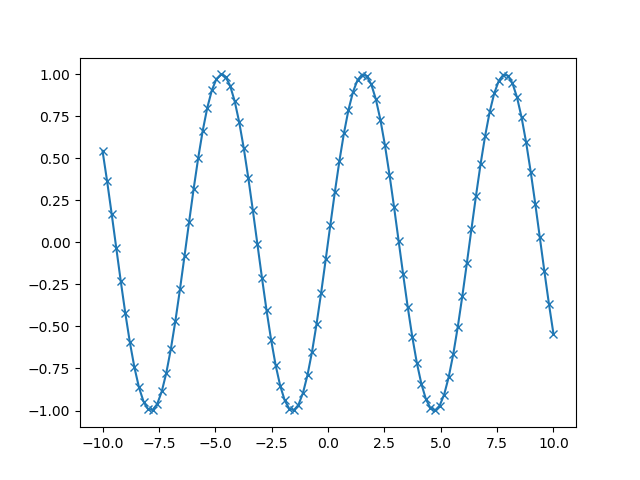

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 간격으로 나뉜 배열을 생성합니다.
x = np.linspace(-10, 10, 100)

# 사인(sin) 함수를 사용하여 y 배열을 생성합니다,
y = np.sin(x)
# 플롯(plot) 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그립니다
plt.plot(x, y, marker="x")

### 1.4.5 pandas

In [7]:
import pandas as pd

# 회원 정보가 들어간 간단한 데이터셋을 생성합니다.
data = {'Name':["John", "Anna","Peter","Linda"],
       'Location':["New York", "Paris", "Berlin","London"],
       'Age':[24,13,53,33],
       }

data_pandas = pd.DataFrame(data)
# IPython.display는 주피터 노트북에서 Dataframe을 미려하게 출력해줍니다.
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
# Age 열의 값이 30 이상인 모든 행을 선택합니다.
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## 1.6 이 책에서 사용하는 소프트웨어 버전

In [9]:
import sys
print("Python 버전: {}".format(sys.version))

import pandas as pd
print("pandas 버전: {}".format(pd.__version__))

import matplotlib
print("matplotlib 버전: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy 버전: {}".format(np.__version__))

import scipy as sp
print("SciPy 버전: {}".format(sp.__version__))

import IPython
print("IPython 버전: {}".format(IPython.__version__))

import sklearn
print("scikit-learn 버전: {}".format(sklearn.__version__))

Python 버전: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
pandas 버전: 0.24.2
matplotlib 버전: 3.0.3
NumPy 버전: 1.16.2
SciPy 버전: 1.2.1
IPython 버전: 7.0.1
scikit-learn 버전: 0.20.3


## 1.7 첫 번째 애플리케이션: 붓꽃의 품종 분류
### 1.7.1 데이터 적재

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
print("iris_dataset의 키:\n{}".format(iris_dataset.keys()))

iris_dataset의 키:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [13]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [14]:
print("특성의 이름:\n{}".format(iris_dataset['feature_names']))

특성의 이름:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [16]:
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [17]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [19]:
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [20]:
print("타깃:\n{}".format(iris_dataset['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 1.7.2 성과 측정: 훈련 데이터와 테스트 데이터

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("X_train의 크기: {}".format(X_train.shape))
print("y_train의 크기: {}".format(y_train.shape))

X_train의 크기: (112, 4)
y_train의 크기: (112,)


In [23]:
print("X_test의 크기: {}".format(X_test.shape))
print("y_test의 크기: {}".format(y_test.shape))

X_test의 크기: (38, 4)
y_test의 크기: (38,)


### 1.7.3 가장 먼저 할 일: 데이터 살펴보기

<IPython.core.display.Javascript object>


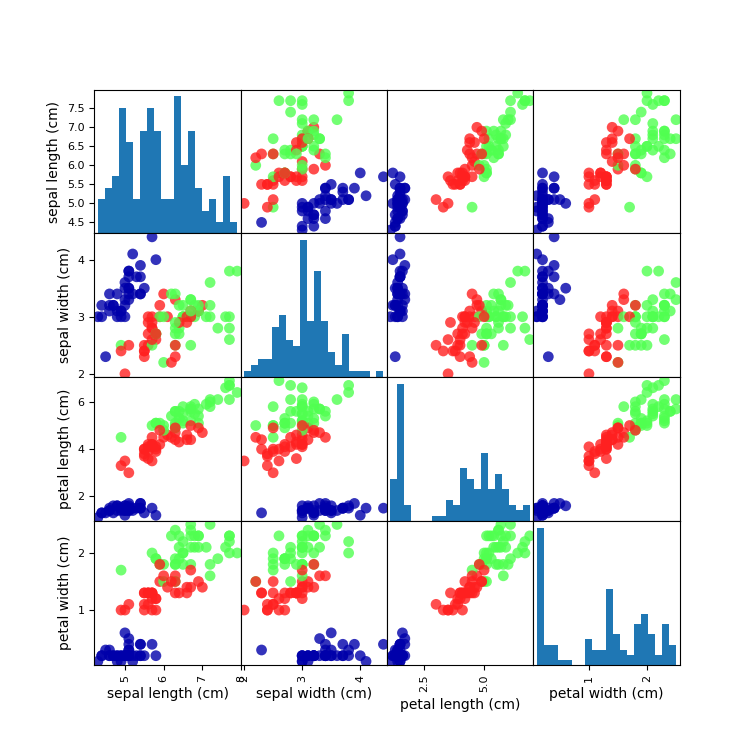

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A2BCE3B70>,
      dtype=object)

In [24]:
import mglearn

# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

### 1.7.4 첫 번째 머신러닝 모델: k-최근접 이웃 알고리즘

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### 1.7.5 예측하기

In [27]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [28]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


### 1.7.6 모델 평가하기

In [30]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n{}".format(y_pred))

테스트 세트에 대한 예측값:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [31]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [32]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## 1.8 요약 및 정리

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트 정확도: 0.97
